In [3]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

In [5]:
# Read the data into a Pandas DataFrame
df = pd.read_csv('resources/play_by_play_2024_cleaned.csv')
df.head()

,play_id,game_id,posteam,defteam,side_of_field,yardline_100,down,yrdln,ydstogo,play_type,...,return_touchdown,field_goal_attempt,fumble,passing_yards,receiving_yards,rushing_yards,fixed_drive_result,drive_time_of_possession,drive_end_transition,qb_epa
0,1,2024_01_ARI_BUF,NaN,NaN,NaN,NaN,NaN,BUF 35,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Touchdown,NaN,NaN,0.000000
1,40,2024_01_ARI_BUF,ARI,BUF,BUF,35.0,NaN,BUF 35,0,kickoff,...,0.0,0.0,0.0,NaN,NaN,NaN,Touchdown,7:13,TOUCHDOWN,0.257819
2,61,2024_01_ARI_BUF,ARI,BUF,ARI,70.0,1.0,ARI 30,10,run,...,0.0,0.0,0.0,NaN,NaN,3.0,Touchdown,7:13,TOUCHDOWN,-0.200602
3,83,2024_01_ARI_BUF,ARI,BUF,ARI,67.0,2.0,ARI 33,7,pass,...,0.0,0.0,0.0,22.0,22.0,NaN,Touchdown,7:13,TOUCHDOWN,2.028874
4,108,2024_01_ARI_BUF,ARI,BUF,BUF,45.0,1.0,BUF 45,10,pass,...,0.0,0.0,0.0,9.0,9.0,NaN,Touchdown,7:13,TOUCHDOWN,0.754242


### Question #1
---
**Ruby Bhatia**
- How do teams perform offensively and defensively in NFL Week 1 games?


### Question #2
----
**Nathan Roller**
- What are tendencies for teams in specific down and distance situations? 


### Question #3 
---
**Justin Nolan**
- How do different team statistics correlate with winning outcomes in Week 1 games?


### Question #4
---
**Darell Johnson**

- What are the conversion rates for possession downs? What tendencies did you identify?

In [11]:
# Step 1: Filter the dataframe for down = 3 or 4 and ydstogo <= 3
money_down = df[(df['down'].isin([3, 4])) & (df['ydstogo'] <= 3)].copy()  # Using .copy() to avoid the warning

# Step 2: Create a new column 'yards_gained' by summing passing and rushing yards
money_down.loc[:, 'yards_gained'] = money_down[['passing_yards', 'rushing_yards']].sum(axis=1)

# Step 3: Create a new column 'result' to indicate if it's a first down or turnover on downs
money_down.loc[:, 'result'] = money_down.apply(
    lambda row: 'first_down' if row['yards_gained'] >= row['ydstogo'] else 'turnover_on_downs',
    axis=1
)

# Now money_down will contain the modified data without the SettingWithCopyWarning
money_down

,play_id,game_id,posteam,defteam,side_of_field,yardline_100,down,yrdln,ydstogo,play_type,...,field_goal_attempt,fumble,passing_yards,receiving_yards,rushing_yards,fixed_drive_result,drive_time_of_possession,drive_end_transition,qb_epa,result
63,1622,2024_01_ARI_BUF,BUF,ARI,BUF,61.0,3.0,BUF 39,1,no_play,...,0.0,0.0,NaN,NaN,NaN,Touchdown,2:21,TOUCHDOWN,-0.800535,turnover_on_downs
102,2608,2024_01_ARI_BUF,BUF,ARI,ARI,13.0,3.0,ARI 13,2,run,...,0.0,0.0,NaN,NaN,1.0,Touchdown,2:48,TOUCHDOWN,-0.816518,turnover_on_downs
103,2632,2024_01_ARI_BUF,BUF,ARI,ARI,12.0,4.0,ARI 12,1,run,...,0.0,0.0,NaN,NaN,1.0,Touchdown,2:48,TOUCHDOWN,1.343717,first_down
123,3124,2024_01_ARI_BUF,BUF,ARI,ARI,37.0,4.0,ARI 37,2,run,...,0.0,0.0,NaN,NaN,5.0,Touchdown,4:48,TOUCHDOWN,2.453890,first_down
148,3741,2024_01_ARI_BUF,BUF,ARI,ARI,20.0,3.0,ARI 20,2,run,...,0.0,0.0,NaN,NaN,-1.0,Field goal,2:34,FIELD_GOAL,-1.196253,turnover_on_downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2155,2024_01_WAS_TB,WAS,TB,TB,40.0,3.0,TB 40,1,run,...,0.0,0.0,NaN,NaN,0.0,Missed field goal,5:39,MISSED_FG,-1.728518,turnover_on_downs
2503,2189,2024_01_WAS_TB,WAS,TB,TB,40.0,4.0,TB 40,1,run,...,0.0,0.0,NaN,NaN,2.0,Missed field goal,5:39,MISSED_FG,2.318735,first_down
2523,2695,2024_01_WAS_TB,TB,WAS,TB,69.0,3.0,TB 31,3,pass,...,0.0,0.0,NaN,NaN,NaN,Punt,1:32,PUNT,-2.572418,turnover_on_downs
2559,3603,2024_01_WAS_TB,TB,WAS,WAS,1.0,3.0,WAS 1,1,pass,...,0.0,0.0,1.0,1.0,NaN,Touchdown,7:38,TOUCHDOWN,1.343011,first_down


In [13]:
money_down = money_down[['play_id', 'down', 'ydstogo', 'yards_gained','play_type', 'result']]
money_down

,play_id,down,ydstogo,yards_gained,play_type,result
63,1622,3.0,1,0.0,no_play,turnover_on_downs
102,2608,3.0,2,1.0,run,turnover_on_downs
103,2632,4.0,1,1.0,run,first_down
123,3124,4.0,2,5.0,run,first_down
148,3741,3.0,2,-1.0,run,turnover_on_downs
...,...,...,...,...,...,...
2502,2155,3.0,1,0.0,run,turnover_on_downs
2503,2189,4.0,1,2.0,run,first_down
2523,2695,3.0,3,0.0,pass,turnover_on_downs
2559,3603,3.0,1,1.0,pass,first_down


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

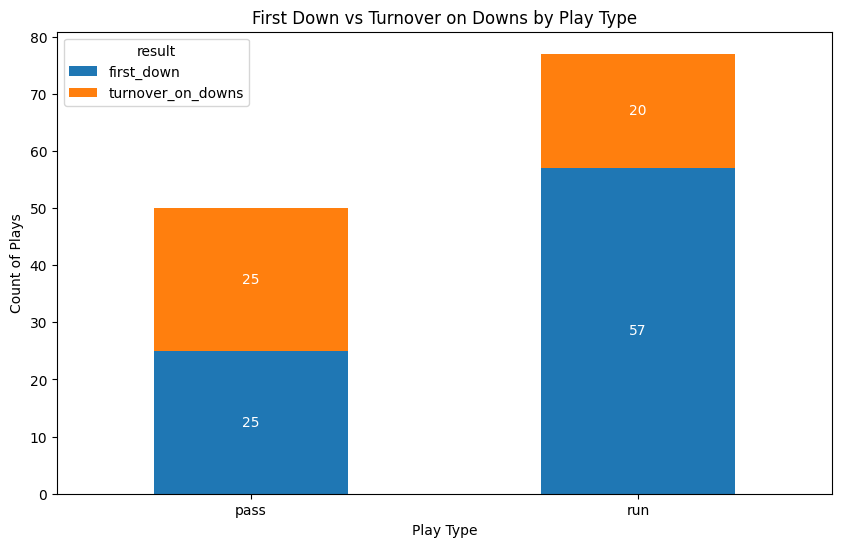

In [37]:
def create_stacked_bar_chart_with_labels(data):
    # Group by play_type and result to get counts
    grouped = data.groupby(['play_type', 'result']).size().unstack()

    # Plot the stacked bar chart
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='white', fontsize=10)
    
    plt.title('First Down vs Turnover on Downs by Play Type')
    plt.xlabel('Play Type')
    plt.ylabel('Count of Plays')
    plt.xticks(rotation=0)
    plt.show()

# Assuming `money_down` contains the relevant filtered data
# Prepare the filtered data for visualization (run and pass plays)
filtered_data = money_down[money_down['play_type'].isin(['run', 'pass'])]

# Create the stacked bar chart visualization
create_stacked_bar_chart_with_labels(filtered_data)